# Comparing Idyoms and IDyOM

In [1]:
using CSV, DataFrames, Plots
using Chakra, Melch
include("src/Idyoms.jl")
using Main.Idyoms

### Load Nova dataset from Melch

In [2]:
Melch.__INIT__("/Users/nick/Dropbox/MelchData")
nova = fnd(Melch.id(0),Melch)
nova.description
melodies = pts(nova)
sequences = [sequence(pts(mel,Melch),Melch) for mel in melodies]
pitch_view = [View(seq,vp(Melch.CPITCH),vp(Melch.CPITCH)) for seq in sequences];

### Choose an IDyOM model

The folder idyom-data contains cvs files output from IDyOM. They model the Nova dataset using the viewpoint CPITCH and various different parameter combinations. We choose one of these models to compare to the output of Idyoms.

In [3]:
idyom_model = "./idyom-data/STMC5I.csv"

"./idyom-data/STMC5I.csv"

### Set parameters

Now we set the corresponding paramters for Idyoms. 

In [4]:
a = Set([54:77...,79,81])
b = Interpolated()
e = C()
u = true
o = Bounded(5)

Bounded{5}()

### Compute the corresponding model in Idyoms

In [5]:
@time pitch_stm = Idyoms.ppm_stm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_stm)

  1.974553 seconds (14.22 M allocations: 1.425 GiB, 14.22% gc time, 36.78% compilation time)


3.0240140188490763

In [6]:
pitch_table = Idyoms.todataframe(pitch_stm);

### Compare values from Idyoms with IDyOM

In [7]:
idyom_data = CSV.File(idyom_model) |> DataFrame;
idyom_prob = idyom_data[!,"probability"];
idyom_ic = idyom_data[!,"information.content"]
DataFrame(Symbol = pitch_table.Symbol, Idyom = idyom_prob, Julia = pitch_table.Prob)

Row,Symbol,Idyom,Julia
,Int64,Float64,Float64
1,65,0.0384615,0.0384615
2,62,0.0192308,0.0192308
3,60,0.0196078,0.0196078
4,60,0.18,0.18
5,60,0.581632,0.581633
6,60,0.613207,0.613208
7,65,0.0789473,0.0789474
8,65,0.11039,0.11039
9,65,0.363014,0.363014


### Plot the values from Idyoms and IDyOM

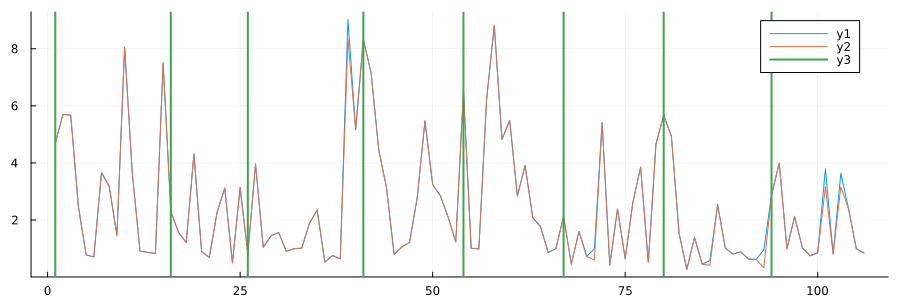

In [8]:
plot(idyom_ic[1:106])
plot!(pitch_table.IC[1:106])
phrases = findall(x->x==1,idyom_data[!,"phrase"][1:106]);
vline!(phrases, lw = 2)
plot!(size=(900,300))

### Discussion 

Idyoms implements, as faithfully as possible, the formulas of Pearce (2005). However, there are still some discrepencies in the values obtained from the two implementations. This is most likely due to the fact that, in Idyoms, NGrams and Views can be constructed from two different viewpoints: one for the target elements and one for the context elements. The result is that the way NGrams are counted, and the way NGram counts are updated, is slightly different in certain senarios. Exactly what is going on here is yet to be determined, but for now, the values are close enough to be confident that Idyoms is reasonably correct.